# **Kütüphanelerin Import Edilmesi**

In [573]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [574]:
#################################################################################
# Denetimsiz Öğrenme Problemleri için Kütüphanelerin Import Edilmesi
#################################################################################

#################################################################################
# K-Means algoritması için kütüphanenin import edilmesi.
#################################################################################
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


#################################################################################
# Hiyerarşik Kümeleme için ilgili Kütüphanelerin Import Edilmesi.
#################################################################################
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


#################################################################################
# Temel Bileşen Analizi Algoritması için Kütüphanin Import Edilmesi
#################################################################################
from sklearn.decomposition import PCA


#################################################################################
# Veri Manipülasyonu ve Matematiksel Hesaplamalar için Kütüphanelerin Import Edilmesi.
#################################################################################
import numpy as np
import pandas as pd


#################################################################################
# Grafik Çizimleri için Kütüphanelerin Import Edilmesi.
#################################################################################
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


#################################################################################
# Ölçeklendirme için Kütüphanelerin Import Edilmesi.
#################################################################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#################################################################################
# Tarih - Saat Değişkenleri için Gerekli Kütüphanenin Import Edilmesi
#################################################################################
import datetime


#################################################################################
# Rastgele sayı üretmek için kütüphanenin import edilmesi.
#################################################################################
import random


#################################################################################
# Çıktı göründüleri için ayarlamaların yapılması.
#################################################################################
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.set_option("display.float_format", lambda x: "%3.f" % x)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.width", 5000)


#################################################################################
# Bazı Uyarıları Almamak için Kütüpanelerin Import Edilmesi.
#################################################################################
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=Warning) #Olası bazı hataları ignore ediyoruz, görmezden geliyoruz.

## **CART için Kütüphane Kurulumları**

In [575]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [576]:
pip install skompiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [577]:
pip install astor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [578]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **İş Problemi**

FLO müşterilerini segmentlere ayırıp bu segmentlere göre
pazarlama stratejileri belirlemek istiyor. Buna yönelik
olarak müşterilerin davranışları tanımlanacak ve bu
davranışlardaki öbeklenmelere göre gruplar oluşturulacak.


# **Veri Seti Hikayesi**

Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında OmniChannel (hem online hem offline alışveriş yapan) 
olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır. 

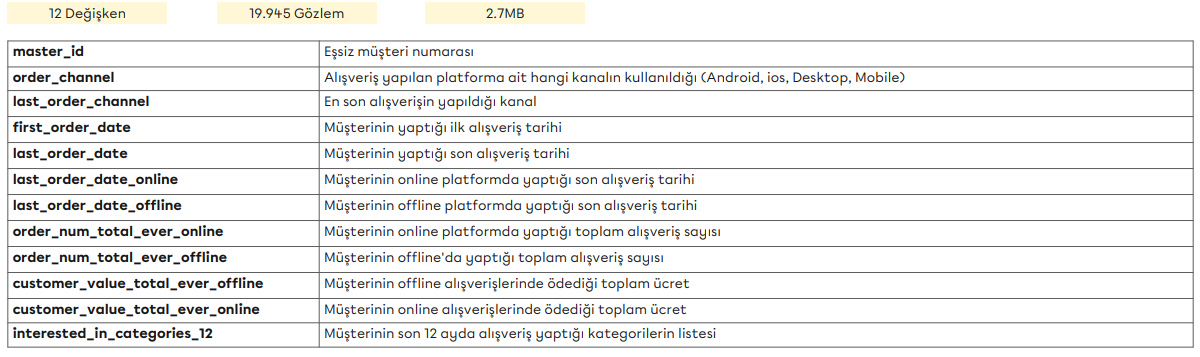

# **Proje Görevleri**

## **Görev 1 : Veriyi Hazırlama**

### **Adım 1:** flo_data_20K.csv verisini okutunuz

In [579]:
df = pd.read_csv("/content/drive/MyDrive/Sıfırdan Başlayanlar İçin Veri Bilimi - miuul/Ödevler - Projeler miuul/3.Machine Learning/6.Proje: Flo Gözetimsiz Öğrenme ile Müşteri Segmentasyonu/flo_data_20k.csv/flo_data_20k.csv")

In [580]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,"1,853.580","[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


### **Adım 2:** Müşterileri segmentlerken kullanacağınız değişkenleri seçiniz.

Not: Tenure (Müşterinin yaşı), Recency (en son kaç gün önce alışveriş yaptığı) gibi yeni değişkenler oluşturabilirsiniz.

In [581]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,"1,853.580","[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


**Rahat çalışabilmek adına değişken isimlerini tek tip boyuta hale getirelim.**

In [582]:
df.columns = [col.upper() for col in df.columns]

In [583]:
df.head()

,MASTER_ID,ORDER_CHANNEL,LAST_ORDER_CHANNEL,FIRST_ORDER_DATE,LAST_ORDER_DATE,LAST_ORDER_DATE_ONLINE,LAST_ORDER_DATE_OFFLINE,ORDER_NUM_TOTAL_EVER_ONLINE,ORDER_NUM_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_ONLINE,INTERESTED_IN_CATEGORIES_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,"1,853.580","[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MASTER_ID                          19945 non-null  object 
 1   ORDER_CHANNEL                      19945 non-null  object 
 2   LAST_ORDER_CHANNEL                 19945 non-null  object 
 3   FIRST_ORDER_DATE                   19945 non-null  object 
 4   LAST_ORDER_DATE                    19945 non-null  object 
 5   LAST_ORDER_DATE_ONLINE             19945 non-null  object 
 6   LAST_ORDER_DATE_OFFLINE            19945 non-null  object 
 7   ORDER_NUM_TOTAL_EVER_ONLINE        19945 non-null  float64
 8   ORDER_NUM_TOTAL_EVER_OFFLINE       19945 non-null  float64
 9   CUSTOMER_VALUE_TOTAL_EVER_OFFLINE  19945 non-null  float64
 10  CUSTOMER_VALUE_TOTAL_EVER_ONLINE   19945 non-null  float64
 11  INTERESTED_IN_CATEGORIES_12        19945 non-null  obj

**Tarih değişkenlerimizi veri tiplerini time olarak güncelleyelim.**

In [585]:
df["FIRST_ORDER_DATE"] = pd.to_datetime(df["FIRST_ORDER_DATE"], format = "%Y-%m-%d")

In [586]:
df["LAST_ORDER_DATE"] = pd.to_datetime(df["LAST_ORDER_DATE"], format = "%Y-%m-%d")

In [587]:
df["LAST_ORDER_DATE_ONLINE"] = pd.to_datetime(df["LAST_ORDER_DATE_ONLINE"], format = "%Y-%m-%d")

In [588]:
df["LAST_ORDER_DATE_OFFLINE"] = pd.to_datetime(df["LAST_ORDER_DATE_OFFLINE"], format = "%Y-%m-%d")

**Yeni değişkenler türetelim.**

**NEW_RECENCY**

In [589]:
import datetime

In [590]:
df["NEW_RECENCY"] = datetime.datetime.today() - df["LAST_ORDER_DATE"]

In [591]:
df["NEW_RECENCY"] = df["NEW_RECENCY"].apply(lambda x: x.days)

In [592]:
df["NEW_RECENCY"].head()

0    688
1    698
2    779
3    728
4    679
Name: NEW_RECENCY, dtype: int64

**NEW_RECENCY_ONLINE**

In [593]:
df["NEW_RECENCY_ONLINE"] = (datetime.datetime.today() - df["LAST_ORDER_DATE_ONLINE"])

In [594]:
df["NEW_RECENCY_ONLINE"] = df["NEW_RECENCY_ONLINE"].apply(lambda x: x.days)

In [595]:
df["NEW_RECENCY_ONLINE"].head()

0    693
1    698
2    779
3    728
4    679
Name: NEW_RECENCY_ONLINE, dtype: int64

**NEW_RECENCY_OFLINE**

In [596]:
df["NEW_RECENCY_OFLINE"] = (datetime.datetime.today() - df["LAST_ORDER_DATE_OFFLINE"])

In [597]:
df["NEW_RECENCY_OFLINE"] = df["NEW_RECENCY_OFLINE"].apply(lambda x: x.days)

In [598]:
df["NEW_RECENCY_OFLINE"].head()

0     688
1    1101
2    1141
3     739
4    1261
Name: NEW_RECENCY_OFLINE, dtype: int64

**NEW_ORDER_NUM_TOTAL_EVER**

In [599]:
df["NEW_ORDER_NUM_TOTAL_EVER"] = df["ORDER_NUM_TOTAL_EVER_ONLINE"] + df["ORDER_NUM_TOTAL_EVER_OFFLINE"]

**NEW_CUSTOMER_VALUE_TOTAL_EVER**

In [600]:
df["NEW_CUSTOMER_VALUE_TOTAL_EVER"] = df["CUSTOMER_VALUE_TOTAL_EVER_OFFLINE"] + df["CUSTOMER_VALUE_TOTAL_EVER_ONLINE"]

In [601]:
df.head()

,MASTER_ID,ORDER_CHANNEL,LAST_ORDER_CHANNEL,FIRST_ORDER_DATE,LAST_ORDER_DATE,LAST_ORDER_DATE_ONLINE,LAST_ORDER_DATE_OFFLINE,ORDER_NUM_TOTAL_EVER_ONLINE,ORDER_NUM_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_ONLINE,INTERESTED_IN_CATEGORIES_12,NEW_RECENCY,NEW_RECENCY_ONLINE,NEW_RECENCY_OFLINE,NEW_ORDER_NUM_TOTAL_EVER,NEW_CUSTOMER_VALUE_TOTAL_EVER
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],688,693,688,5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,"1,853.580","[ERKEK, COCUK, KADIN, AKTIFSPOR]",698,698,1101,21.000,"2,013.550"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",779,779,1141,5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",728,728,739,2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],679,679,1261,2.000,209.980


In [602]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
  """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisinde numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.
  """
  # Kategorik Değişkenler: cat_cols & num_but_car
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"] 
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols += num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  # Numerik Değişkenler: num_cols
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]



  # Raporlama Bölümü:
  # Raporlama Bölümü:
  print(f"Obsertavions - (Gözlem Sayısı): {dataframe.shape[0]}")
  print(f"Variables (Değişken Sayısı): {dataframe.shape[1]}")
  print(f"cat_cols (Kategorik Değişkenler): {len(cat_cols)}")
  print(f"num_cols (Sayısal Değişkenler): {len(num_cols)}")
  print(f"cat_but_car (Kardinalitesi Yüksek Değişkenler): {len(cat_but_car)}")
  print(f"num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [603]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obsertavions - (Gözlem Sayısı): 19945
Variables (Değişken Sayısı): 17
cat_cols (Kategorik Değişkenler): 2
num_cols (Sayısal Değişkenler): 13
cat_but_car (Kardinalitesi Yüksek Değişkenler): 2
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 0


In [604]:
X = df[num_cols]

In [605]:
X.head()

,FIRST_ORDER_DATE,LAST_ORDER_DATE,LAST_ORDER_DATE_ONLINE,LAST_ORDER_DATE_OFFLINE,ORDER_NUM_TOTAL_EVER_ONLINE,ORDER_NUM_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_ONLINE,NEW_RECENCY,NEW_RECENCY_ONLINE,NEW_RECENCY_OFLINE,NEW_ORDER_NUM_TOTAL_EVER,NEW_CUSTOMER_VALUE_TOTAL_EVER
0,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,688,693,688,5.000,939.370
1,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,"1,853.580",698,698,1101,21.000,"2,013.550"
2,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,779,779,1141,5.000,585.320
3,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,728,728,739,2.000,121.970
4,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,679,679,1261,2.000,209.980


In [606]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   FIRST_ORDER_DATE                   19945 non-null  datetime64[ns]
 1   LAST_ORDER_DATE                    19945 non-null  datetime64[ns]
 2   LAST_ORDER_DATE_ONLINE             19945 non-null  datetime64[ns]
 3   LAST_ORDER_DATE_OFFLINE            19945 non-null  datetime64[ns]
 4   ORDER_NUM_TOTAL_EVER_ONLINE        19945 non-null  float64       
 5   ORDER_NUM_TOTAL_EVER_OFFLINE       19945 non-null  float64       
 6   CUSTOMER_VALUE_TOTAL_EVER_OFFLINE  19945 non-null  float64       
 7   CUSTOMER_VALUE_TOTAL_EVER_ONLINE   19945 non-null  float64       
 8   NEW_RECENCY                        19945 non-null  int64         
 9   NEW_RECENCY_ONLINE                 19945 non-null  int64         
 10  NEW_RECENCY_OFLINE                

In [607]:
date_col = [col for col in df.columns if df[col].dtypes == "datetime64[ns]"]

In [608]:
X = X.drop(date_col, axis=1)

In [609]:
X.head()

,ORDER_NUM_TOTAL_EVER_ONLINE,ORDER_NUM_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_ONLINE,NEW_RECENCY,NEW_RECENCY_ONLINE,NEW_RECENCY_OFLINE,NEW_ORDER_NUM_TOTAL_EVER,NEW_CUSTOMER_VALUE_TOTAL_EVER
0,4.000,1.000,139.990,799.380,688,693,688,5.000,939.370
1,19.000,2.000,159.970,"1,853.580",698,698,1101,21.000,"2,013.550"
2,3.000,2.000,189.970,395.350,779,779,1141,5.000,585.320
3,1.000,1.000,39.990,81.980,728,728,739,2.000,121.970
4,1.000,1.000,49.990,159.990,679,679,1261,2.000,209.980


## **Görev 2: K-Means ile Müşteri Segmentasyonu**

### **Adım 1:** Değişkenleri standartlaştırınız.

In [610]:
ss = MinMaxScaler((0,1))

**Yeni DataFrame'imimizi az önce X olarak atadığımız değişkenden standartlaştırma yaparak df değişkeni olarak tekrar atayıp devam edelim.**

In [611]:
df = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

In [612]:
df.head()

,ORDER_NUM_TOTAL_EVER_ONLINE,ORDER_NUM_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_ONLINE,NEW_RECENCY,NEW_RECENCY_ONLINE,NEW_RECENCY_OFLINE,NEW_ORDER_NUM_TOTAL_EVER,NEW_CUSTOMER_VALUE_TOTAL_EVER
0,0.015,0.000,0.007,0.017,0.255,0.037,0.106,0.015,0.020
1,0.090,0.009,0.008,0.041,0.282,0.039,0.588,0.095,0.043
2,0.010,0.009,0.010,0.008,0.504,0.069,0.635,0.015,0.012
3,0.000,0.000,0.002,0.002,0.364,0.050,0.166,0.000,0.002
4,0.000,0.000,0.002,0.003,0.230,0.032,0.775,0.000,0.004


### **Adım 2:** Optimum küme sayısını belirleyiniz.

In [613]:
kmeans = KMeans()

In [614]:
ssd = []

In [615]:
K = range(1, 30)

In [616]:
for k in K:
  kmeans = KMeans(n_clusters=k).fit(df)
  ssd.append(kmeans.inertia_)

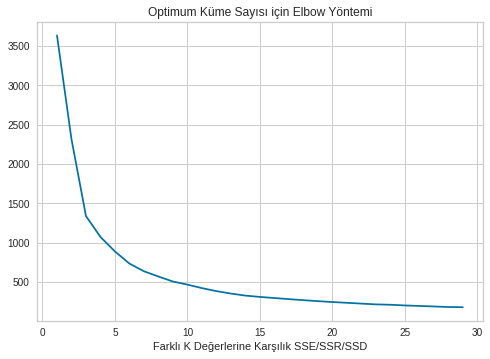

In [617]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi")
plt.show()

In [618]:
kmeans = KMeans()

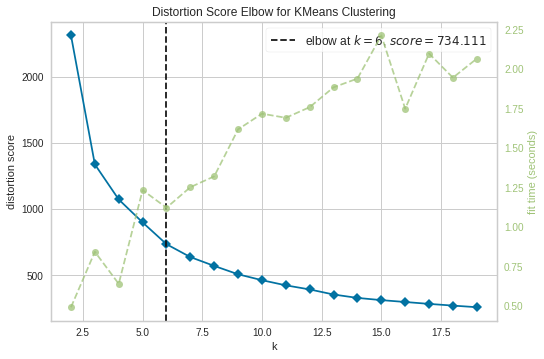

In [619]:
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df)
elbow.show();

**Optimum küme sayısının 6 olduğunu görmekteyiz.**

### **Adım 3:** Modelinizi oluşturunuz ve müşterilerinizi segmentleyiniz.

**K-Means algoritmasını oluşturalım.**

In [620]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

**Algoritmaların parametrelerine bakalım.**

In [621]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

**Küme sayısı.**

In [622]:
kmeans.n_clusters

6

**Altı küme ve bu kümelerin merkezlerini inceleyelim.**

In [623]:
kmeans.cluster_centers_

array([[0.01478489, 0.00518858, 0.00961306, 0.01399223, 0.12682804,
        0.01745559, 0.68727474, 0.0175128 , 0.01710948],
       [0.0111142 , 0.01323782, 0.01878233, 0.01154421, 0.13488748,
        0.07713813, 0.13251783, 0.01820705, 0.01831706],
       [0.00714251, 0.00726817, 0.01182337, 0.0078723 , 0.87162199,
        0.18471403, 0.51499944, 0.0110316 , 0.0119495 ],
       [0.00811954, 0.01083427, 0.01615696, 0.00870971, 0.47646735,
        0.1260819 , 0.25545007, 0.01392944, 0.01448622],
       [0.0036443 , 0.0104466 , 0.01690096, 0.00356253, 0.41732109,
        0.65531625, 0.17540513, 0.00926724, 0.00970612],
       [0.01086882, 0.00440584, 0.00912689, 0.01087037, 0.50292689,
        0.06921882, 0.70541924, 0.01319363, 0.01384009]])

**Kümelere verilen etiketleri (labels) görmek istersek.**

In [624]:
kmeans.labels_

array([1, 0, 5, ..., 0, 1, 2], dtype=int32)

**Model Sonuç Değerlendirme**

**SSD Değeri:**

In [625]:
kmeans.inertia_

734.1103605922755

In [626]:
clusters_kmeans = kmeans.labels_

In [627]:
np.sort(clusters_kmeans)

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

**Veri setini tekrar okutup her bir gözlemimize ait olan kümelere yanlarına getirelim.**

In [628]:
km_segment_df = pd.read_csv("/content/drive/MyDrive/Sıfırdan Başlayanlar İçin Veri Bilimi - miuul/Ödevler - Projeler miuul/3.Machine Learning/6.Proje: Flo Gözetimsiz Öğrenme ile Müşteri Segmentasyonu/flo_data_20k.csv/flo_data_20k.csv")

In [629]:
km_segment_df["cluster"] = clusters_kmeans

In [630]:
km_segment_df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,cluster
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,"1,853.580","[ERKEK, COCUK, KADIN, AKTIFSPOR]",0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],0


**Her bir gözlemimizin ait olduğu küme değerleri 0'dan 5'e değil de 1'den 6'ya şeklinde yapalım.**

In [631]:
km_segment_df["cluster"] = km_segment_df["cluster"] + 1

**Her bir gözlemimizin hangi kümeye ait olduğunu görmek istersek:**

In [632]:
for col in range(1, 7):
  print(km_segment_df[km_segment_df["cluster"] == col].head())
  print()

                               master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12  cluster
1   f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10                       19.000                         2.000                            159.970                         1,853.580  [ERKEK, COCUK, KADIN, AKTIFSPOR]        1
4   d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop       2019-08-03      2021-03-07             2021-03-07              2019-08-03                        1.000                         1.000                             49.990                           159.990                       [AKTIFSPOR]        1
8   cfbda69e-5b4f-11ea-ac

### **Adım 4:** Herbir segmenti istatistiksel olarak inceleyeniz.

**Her bir küme etiketine göre değişkenlerimizi gruplayıp ortalama, içerisinde kaç veri olduğunu ve medyan gibi istatisitksel değerlere erişelim.**

In [633]:
km_segment_df.groupby("cluster").agg(["count", "mean", "median"])

order_num_total_ever_online              order_num_total_ever_offline              customer_value_total_ever_offline                 customer_value_total_ever_online                
                              count  mean median                        count  mean median                             count    mean  median                            count    mean  median
cluster                                                                                                                                                                                      
1                              4690 3.941  2.000                         4690 1.560  1.000                              4690 184.042 139.950                             4690 645.309 393.200
2                              5135 3.211  2.000                         5135 2.429  2.000                              5135 350.112 259.970                             5135 534.812 289.970
3                              2752 2.421  1.500                         2752 1.785  1.000                              2752 224.171 159.895                             2752 368.834 234.975
4                              2862 2.616  2.000                         2862 2.171  2.000                              2862 302.607 227.480                             2862 406.793 256.205
5                               928 1.725  1.000                          928 2.128  2.000                               928 316.062 230.975                              928 174.042 119.990
6                              3578 3.164  2.000                         3578 1.476  1.000                              3578 175.298 129.990                             3578 504.624 308.490

**Küme 1:** 
* Birinci kümeye ait 2748 müşterimiz bulunmakta.
* Ortalama yaklaşık 2.4 sipariş online, 1.7 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 224 para birimi offline, 369 para birimi online olarak alışveriş yapıldığı görülmekte.
* Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 2:** 
* İkinci kümeye ait 4701 müşterimiz bulunmakta.
* Ortalama yaklaşık 4 sipariş online, 1.5 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 183.95 para birimi offline, 644.27 para birimi online olarak alışveriş yapıldığı görülmekte.
* Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 3:** 
* Üçüncü kümeye ait 5136 müşterimiz bulunmakta.
* Ortalama yaklaşık 3.21 sipariş online, 2.42 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 350.11 para birimi offline, 534.89 para birimi online olarak alışveriş yapıldığı görülmekte.
* Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 4:** 
* Dördüncü kümeye ait 3571 müşterimiz bulunmakta.
* Ortalama yaklaşık 3.16 sipariş online, 1.47 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 175.41 para birimi offline, 505.21 para birimi online olarak alışveriş yapıldığı görülmekte.
* Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 5:** 
* Beşinci kümeye ait 2860 müşterimiz bulunmakta.
* Ortalama yaklaşık 2.61 sipariş online, 2.17 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 302.70 para birimi offline, 406.71 para birimi online olarak alışveriş yapıldığı görülmekte.
- Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 6:** 
* Altıncı kümeye ait 929 müşterimiz bulunmakta.
* Ortalama yaklaşık 1.72 sipariş online, 2.12 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 315.77 para birimi offline, 174.07 para birimi online olarak alışveriş yapıldığı görülmekte.

---

* Şuan altı kümeye ayırdık vebu bizim için optimum küme sayısı olmuş oldu.
* Ama burda sadece algoritmaların verdiği sonuçlara bakmak yerine kendimiz ihtiyaçlarımıza göre müdahele etmemiz gerekebilir.
* Örneğin Türkiye'de her ilde mağazamız var ve bu mağazalara teftişe gitmedini istediğimiz ekibimiz var. 
* Her ile bir kişi göndermek istemek (81 kişi demek oluyor) bu altından kalkılamayacak maliyetlere yol açabilir. 
* Yani burda birçok farklı açıdan en iyi kararı veriyor olmamız gerekiyor.
* O halde şunu diyebiliriz: Coğrafi olarak bölgelere ayırıpp o bölgelere teftiş için personel gönderelim. 
* Yani yedi personel bizim için yeterli.
* Burda başka bir problem ortaya çıkabilir: Bir bölge de ortalama 5 mağazamız varken diğer bölge de ise 20 mağaza olabilir. 
* Bu durumda da bölgelere ayırdığımızda her bölgeye düşen mağaza sayısını (yani bizim projemiz için müşteri sayısı) dengelememiz gerekiyor.
* Bizim projemize odaklanalım.

---

* Altı kümeye ayırdık, bu küme sayısını programatik olarak hatalarımızı min. yapan optimum küme sayısı olarak bulundu.
* Biz burda ortalama değerleri açısından her bir kümenin içindeki her bir değişkenin diğer kümelerdeki ortalama değerler arasındaki farkın min. olduğu noktalarda birleştirme yapabiliriz.
* Yani ihtiyaçlarımıza göre altı kümeyi beş kümeye, dört kümeye düşürebiliriz.3. ve 4. kümenin ortalama değerlerine odaklandığımız da dört değişken de iki değişkenin ortalama değerleri birbirine oldukça yakın olduğunu yani bu  iki kümeyi birleştirebileceğimiz anlamına geliyor.

---

* Aynı şekilde 1. ve 5. kümelere odaklanalım. İçerisinde yer alan dört değişkenin üçününün ortalama değerleri birbirine oldukça yakın. Bundan dolayı bu iki kümeyi birleştirip bir küme haline getirebiliriz.

## **Görev 3:  Hierarchical Clustering ile Müşteri Segmentasyonu**

### **Adım 1:** Görev 2'de standırlaştırdığınız dataframe'i kullanarak optimum küme sayısını belirleyiniz.

**Agglomaerative Birleştirici yöntemini kullanarak Hiyerarşik Kümeleme gerçekleştirelim.**

In [634]:
df.head()

,ORDER_NUM_TOTAL_EVER_ONLINE,ORDER_NUM_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_OFFLINE,CUSTOMER_VALUE_TOTAL_EVER_ONLINE,NEW_RECENCY,NEW_RECENCY_ONLINE,NEW_RECENCY_OFLINE,NEW_ORDER_NUM_TOTAL_EVER,NEW_CUSTOMER_VALUE_TOTAL_EVER
0,0.015,0.000,0.007,0.017,0.255,0.037,0.106,0.015,0.020
1,0.090,0.009,0.008,0.041,0.282,0.039,0.588,0.095,0.043
2,0.010,0.009,0.010,0.008,0.504,0.069,0.635,0.015,0.012
3,0.000,0.000,0.002,0.002,0.364,0.050,0.166,0.000,0.002
4,0.000,0.000,0.002,0.003,0.230,0.032,0.775,0.000,0.004


In [635]:
hc_average = linkage(df, "average")

**Dendogram şeması oluşturalım ve bu şemayı inceleyelim.**

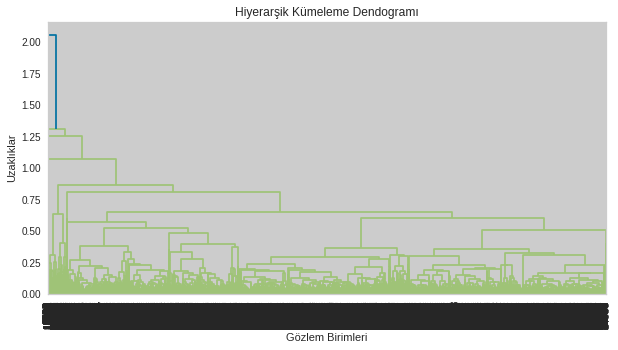

In [636]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()

**Gözlem sayımız çok olduğu için dendogram şemasını anlamak biraz zor oldu.**

**Daha az sayıda gözlem göreceğimiz şekilde küme sayısını 10'a düşürelim.**

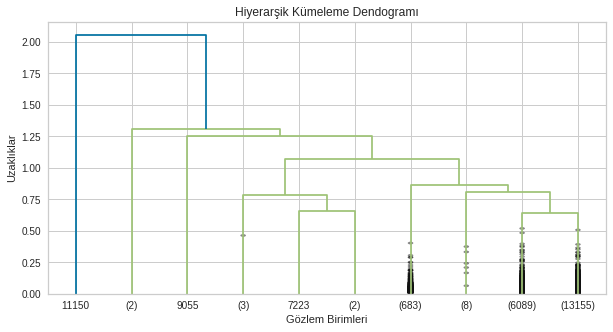

In [637]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode = "lastp", #trancate modunu aktif etmiş olduk.
           p=10,
           show_contracted=True ,
           leaf_font_size=10)
plt.show()

**Optimum Küme Sayısını Belirleyelim.**

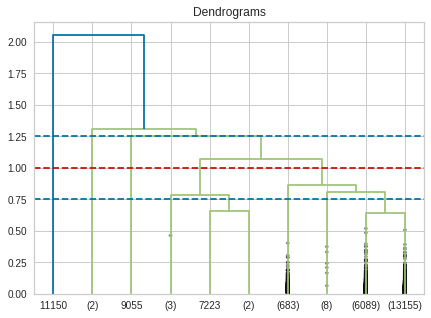

In [638]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average,
                  truncate_mode= "lastp",
                  p=10,
                  show_contracted=True,
                  leaf_font_size=10)
plt.axhline(y=0.75, color='b', linestyle='--')
plt.axhline(y=1.0, color='r', linestyle='--')
plt.axhline(y=1.25, color='b', linestyle='--')
plt.show()

### **Adım 2:** Modelinizi oluşturunuz ve müşterileriniz segmentleyiniz.

**Final Modeli Oluşturalım**

In [639]:
from sklearn.cluster import AgglomerativeClustering

In [640]:
cluster = AgglomerativeClustering(n_clusters=6, linkage="average")

In [641]:
clusters = cluster.fit_predict(df)

In [642]:
hi_segment_df = pd.read_csv("/content/drive/MyDrive/Sıfırdan Başlayanlar İçin Veri Bilimi - miuul/Ödevler - Projeler miuul/3.Machine Learning/6.Proje: Flo Gözetimsiz Öğrenme ile Müşteri Segmentasyonu/flo_data_20k.csv/flo_data_20k.csv")

**Oluşturduğu küme etiketlerini (labels) veri setine değişken olarak ekleyelim tıpkı bir denedimli öğrenme problemi gibi.**

In [643]:
hi_segment_df["hi_cluster_no"] = clusters

In [644]:
hi_segment_df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,hi_cluster_no
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,"1,853.580","[ERKEK, COCUK, KADIN, AKTIFSPOR]",0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],0


In [645]:
hi_segment_df["hi_cluster_no"] = hi_segment_df["hi_cluster_no"] + 1

In [646]:
hi_segment_df["kmeans_cluster_no"] = clusters_kmeans

In [647]:
hi_segment_df["kmeans_cluster_no"] = hi_segment_df["kmeans_cluster_no"] + 1

In [648]:
hi_segment_df["hi_cluster_no"] = clusters

In [649]:
hi_segment_df["hi_cluster_no"] = hi_segment_df["hi_cluster_no"] + 1

In [650]:
hi_segment_df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,hi_cluster_no,kmeans_cluster_no
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],1,2
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,"1,853.580","[ERKEK, COCUK, KADIN, AKTIFSPOR]",1,1
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",1,6
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",1,4
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],1,1


### **Adım 3:** Her bir segmenti istatistiksel olarak inceleyeniz.

**K-Means algoritmasından gelen etiketleri almadan gruplama işlemi gerçekleştirelim.**

In [651]:
hi_segment_df.groupby("hi_cluster_no").agg(["count", "mean", "median"])[["order_num_total_ever_online",	"order_num_total_ever_offline",	
                                                                         "customer_value_total_ever_offline",	"customer_value_total_ever_online"]]

order_num_total_ever_online                 order_num_total_ever_offline               customer_value_total_ever_offline                       customer_value_total_ever_online                      
                                    count    mean  median                        count   mean median                             count       mean     median                            count       mean     median
hi_cluster_no                                                                                                                                                                                                      
1                                   19252   3.133   2.000                        19252  1.896  1.000                             19252    249.709    176.460                            19252    499.530    296.440
2                                       6  65.000  66.500                            6  1.500  1.000                                 6    501.265    359.835                                6 23,734.687 24,144.180
3                                     683   1.653   1.000                          683  2.136  2.000                               683    317.134    239.980                              683    163.442    115.190
4                                       1   1.000   1.000                            1  3.000  3.000                                 1 18,119.140 18,119.140                                1  2,587.200  2,587.200
5                                       1 200.000 200.000                            1  2.000  2.000                                 1    684.970    684.970                                1 45,220.130 45,220.130
6                                       2   1.500   1.500                            2 98.000 98.000                                 2  9,335.855  9,335.855                                2    141.980    141.980

**Küme 1:** 
* Birinci kümeye ait 19252 müşterimiz bulunmakta.
* Ortalama yaklaşık 3.13 sipariş online, 1.89 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 249.70 para birimi offline, 499.53 para birimi online olarak alışveriş yapıldığı görülmekte.
* Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 2:** 
* İkinci kümeye ait 6 müşterimiz bulunmakta.
* Ortalama yaklaşık 65 sipariş online, 1.5 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 501.26 para birimi offline, 23,744.687 para birimi online olarak alışveriş yapıldığı görülmekte.
* Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 3:** 
* Üçüncü kümeye ait 683 müşterimiz bulunmakta.
* Ortalama yaklaşık 1.65 sipariş online, 2.13 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 317.13 para birimi offline, 163.44 para birimi online olarak alışveriş yapıldığı görülmekte.
* Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 4:** 
* Dördüncü kümeye ait 1 müşterimiz bulunmakta.
* Ortalama yaklaşık 1 sipariş online, 3 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 18,119.14 para birimi offline, 2,587.20 para birimi online olarak alışveriş yapıldığı görülmekte.
* Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 5:** 
* Beşinci kümeye ait 1 müşterimiz bulunmakta.
* Ortalama yaklaşık 200 sipariş online, 2 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 684.97 para birimi offline, 45,220.13 para birimi online olarak alışveriş yapıldığı görülmekte.
- Diğer kümeler de benzer şekilde ilerlemektedir.

**Küme 6:** 
* Altıncı kümeye ait 2 müşterimiz bulunmakta.
* Ortalama yaklaşık 1.5 sipariş online, 98 sipariş offline olarak verildiği görülmekte.
* Ortalama olarak yaklaşık 9,335.85 para birimi offline, 141.98 para birimi online olarak alışveriş yapıldığı görülmekte.